#A cloth manufacturing company is interested to know about the segment or attributes causes high sale.Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Company_Data.csv to Company_Data.csv


In [2]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
import pandas as pd
# Read the Excel file
df = pd.read_csv('Company_Data.csv')
# Display the first few rows of the dataset
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA

In [5]:
# Display the first few rows of the dataset
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
# Summary statistics of the numerical columns
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
df.describe(include=object)

,ShelveLoc,Urban,US
count,400,400,400
unique,3,2,2
top,Medium,Yes,Yes
freq,219,282,258


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [10]:
df.shape

(400, 11)

# to remove duplicated values

In [11]:
#finding duplicates
df.duplicated().sum()

0

# To deal with missing values

In [12]:
#finding missing values
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

#Analysing data

Text(0.5, 1.0, 'Correlation Heatmap')

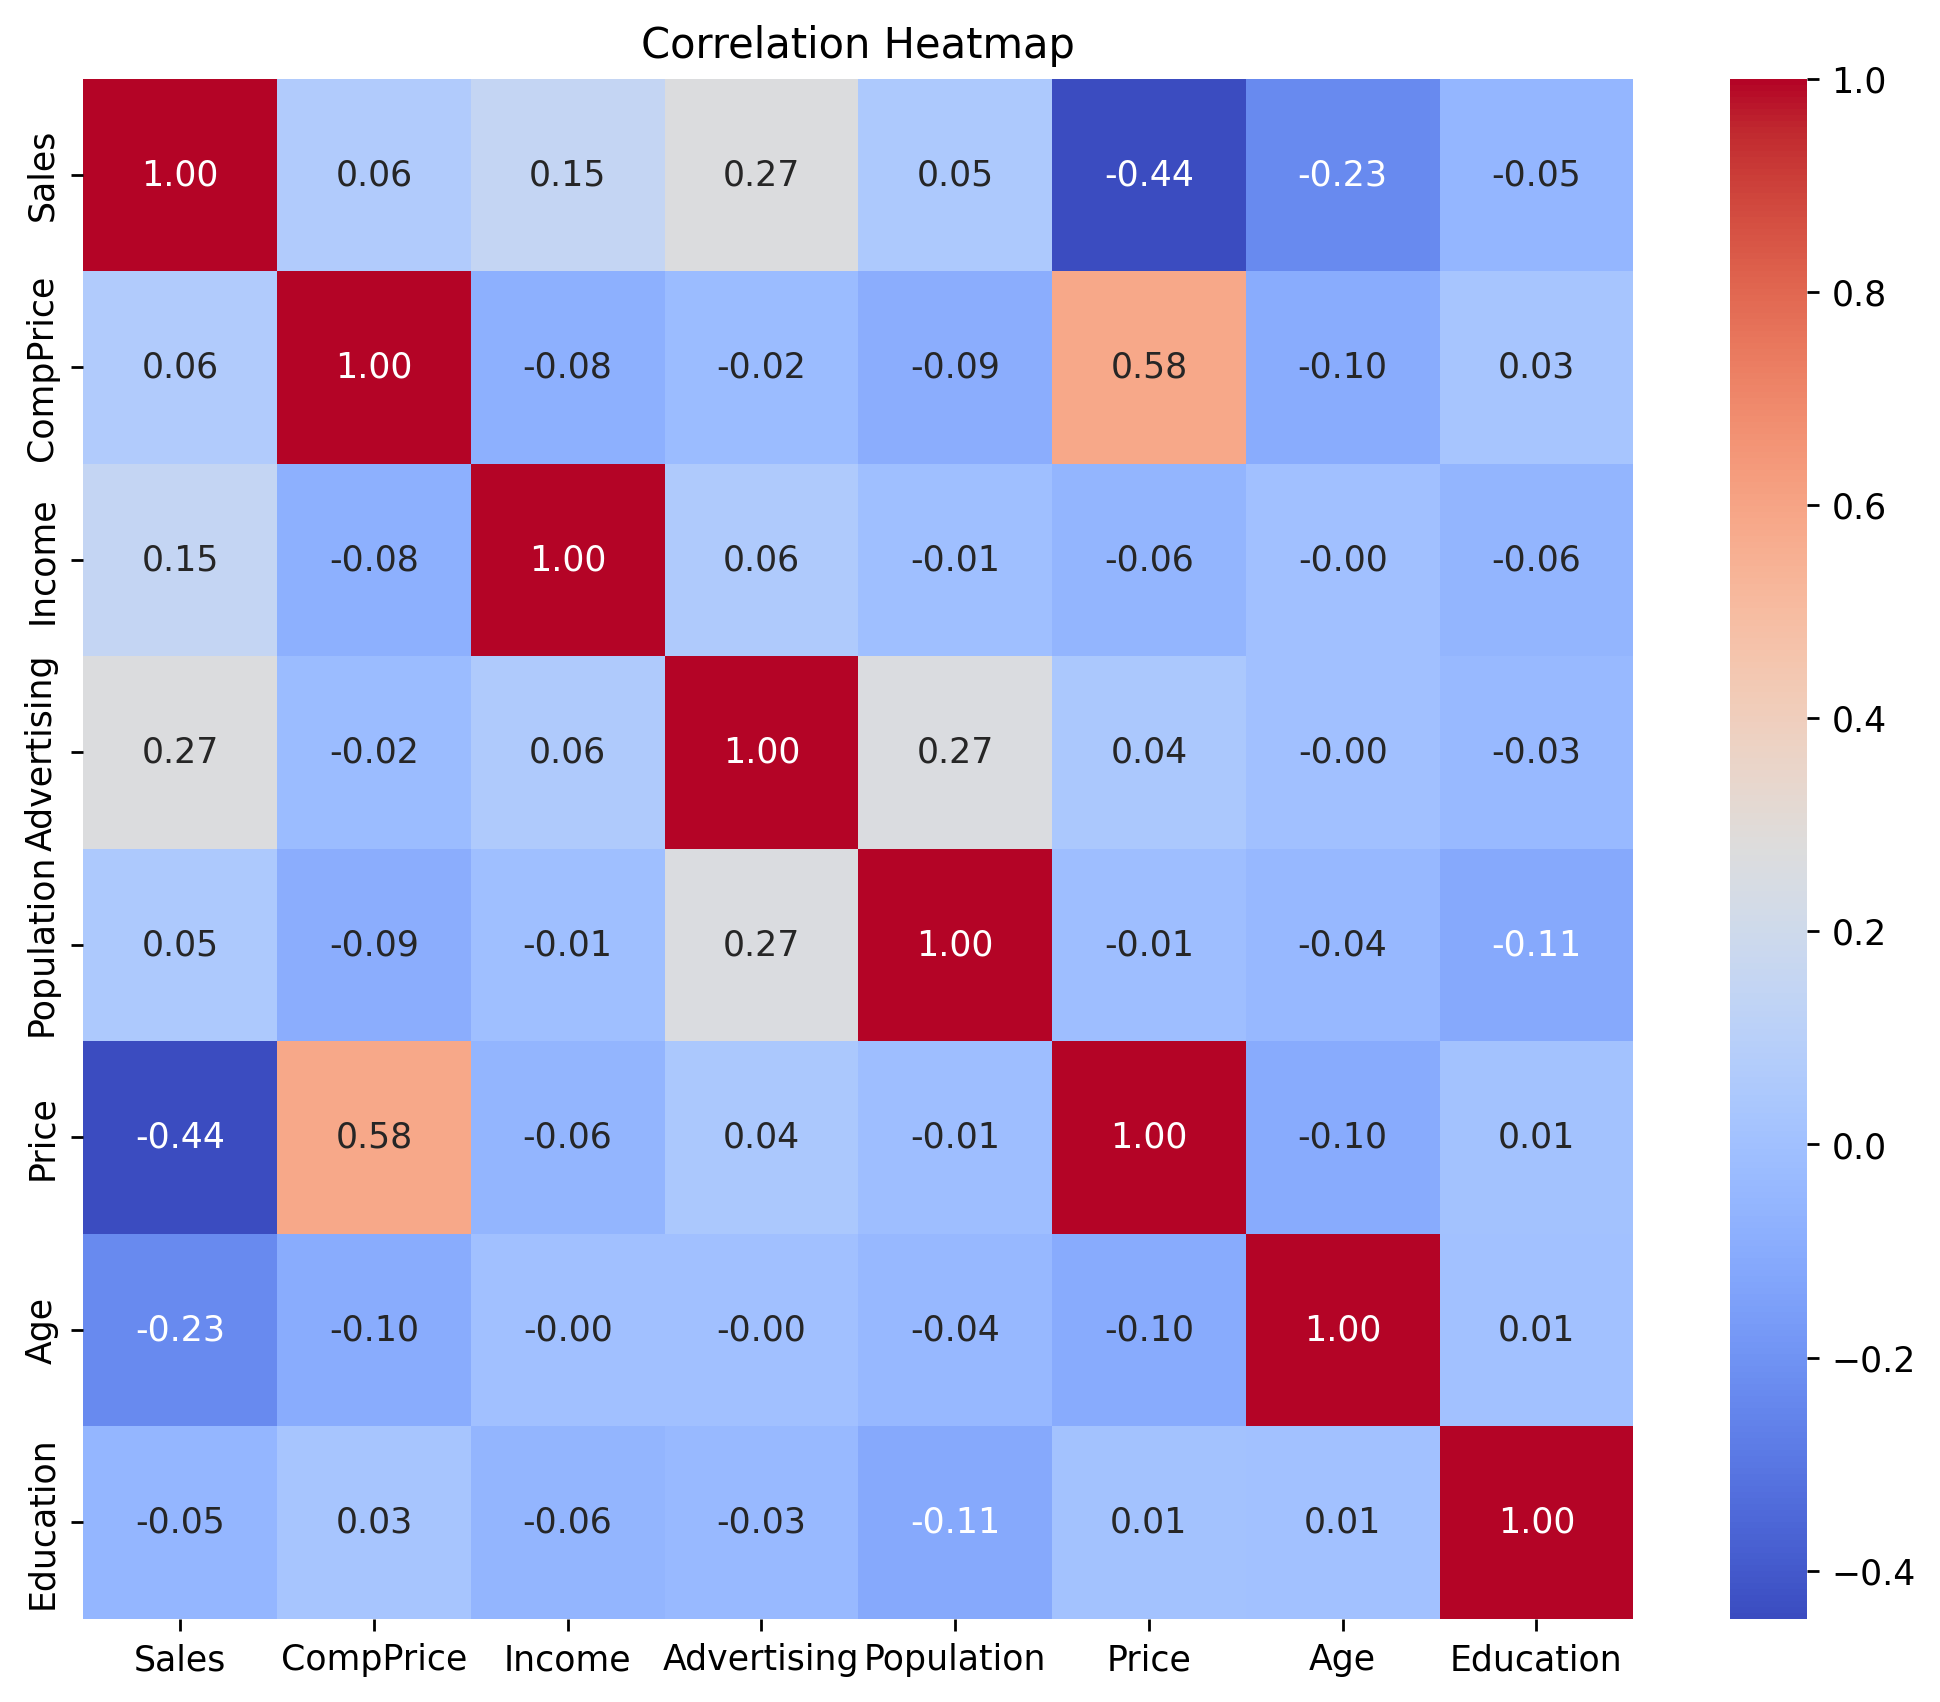

In [13]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

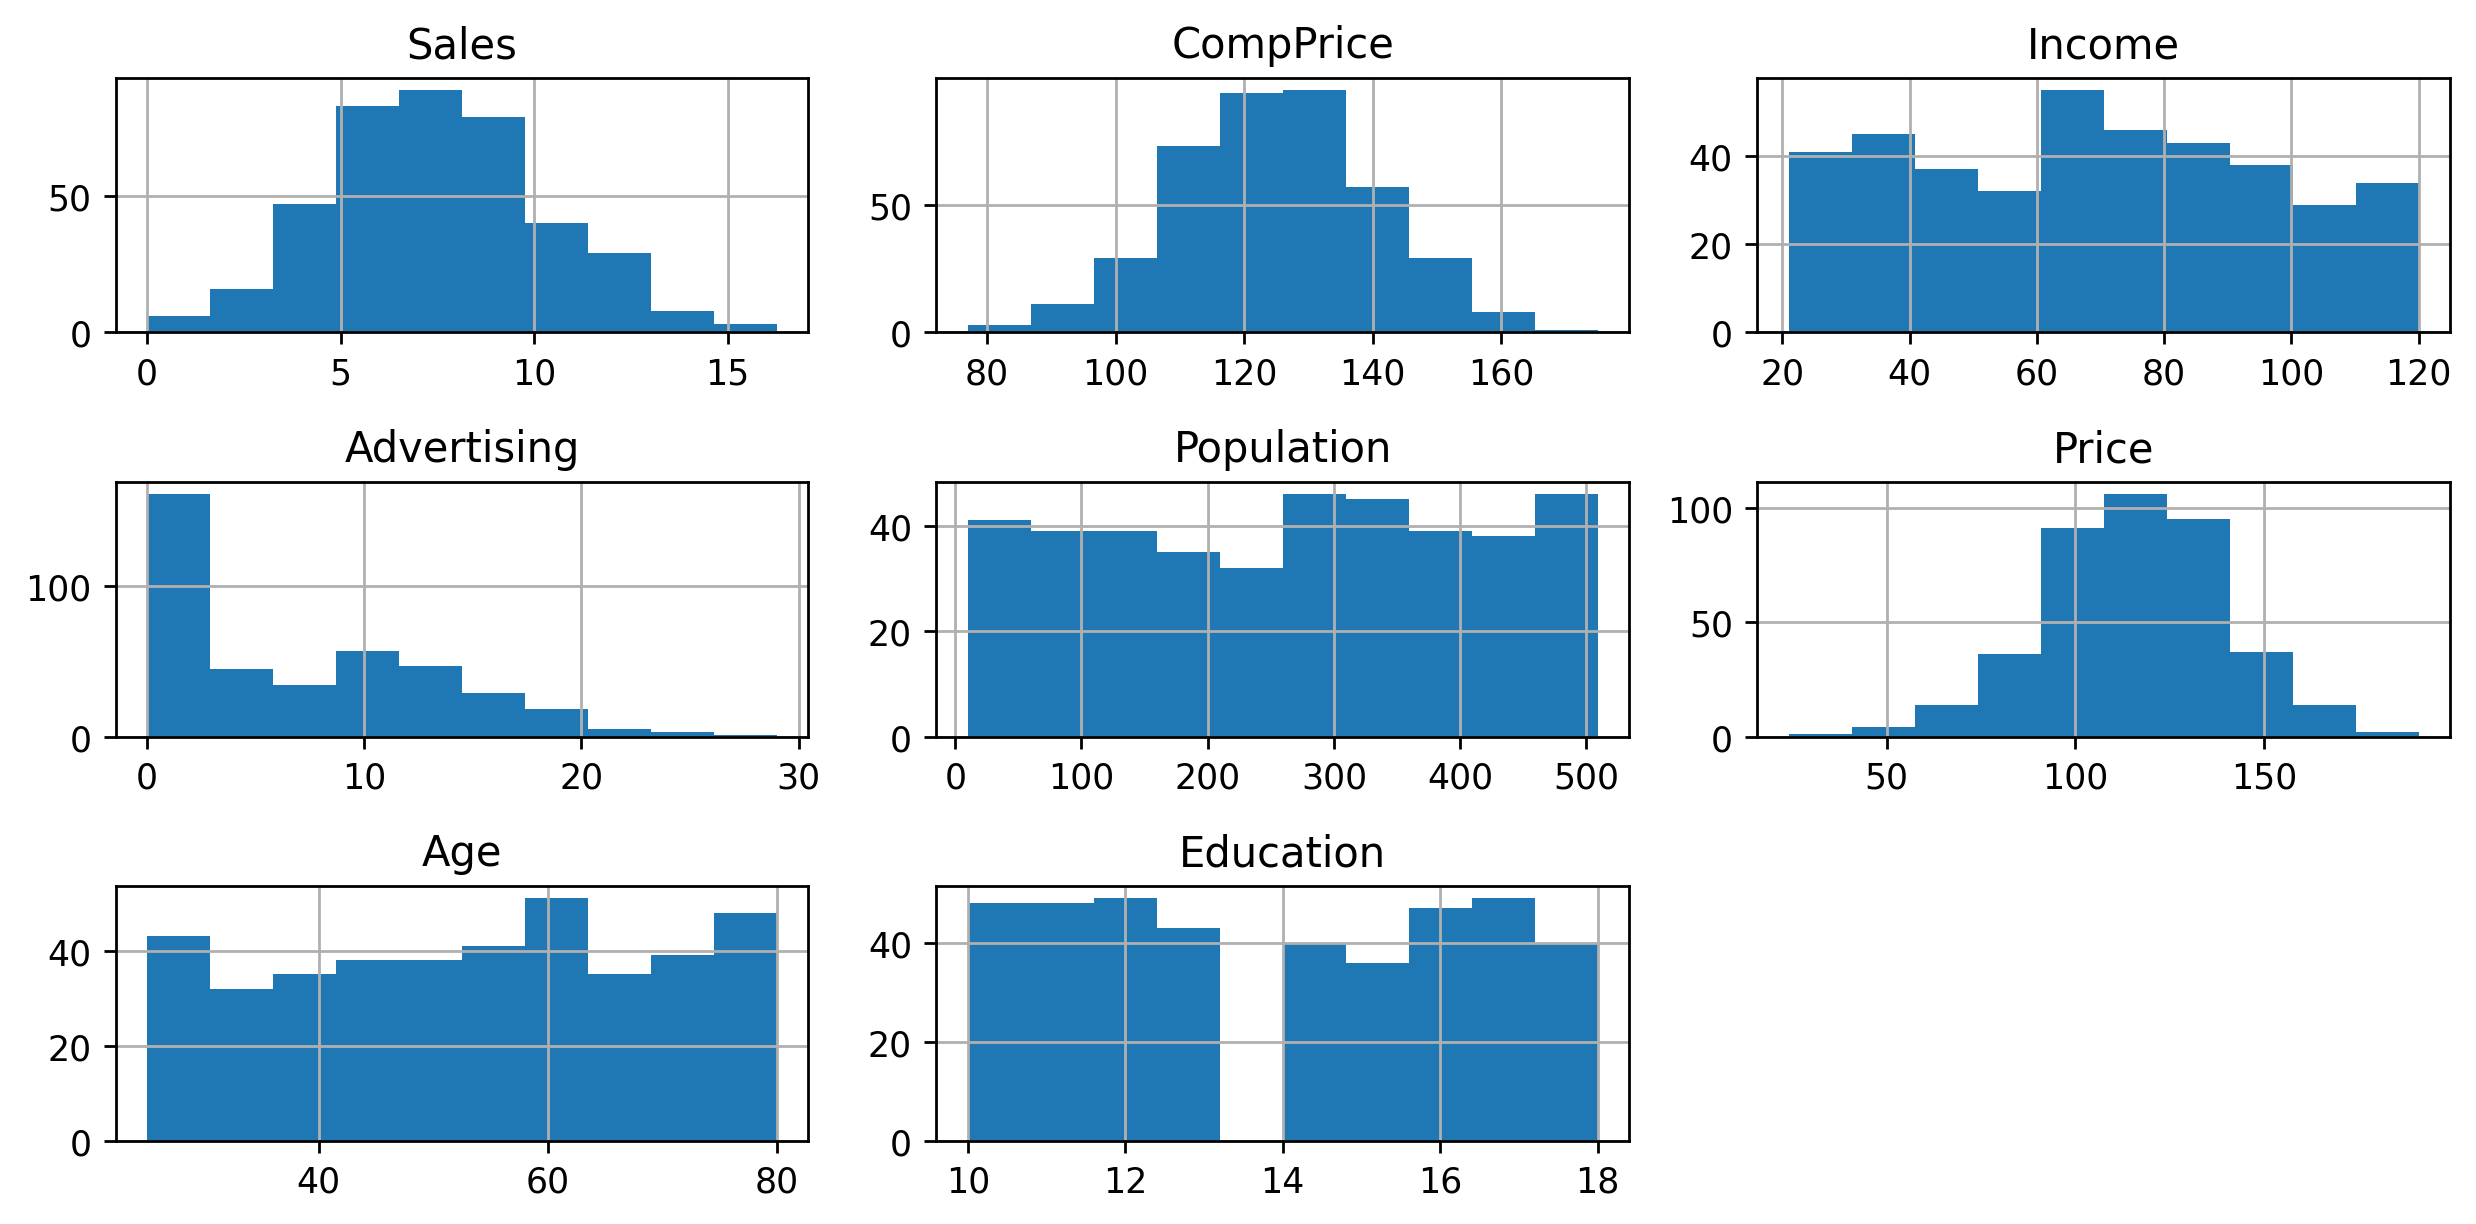

In [14]:
df.hist()
plt.tight_layout()

In [ ]:
#scatterplot to understand relatinship

In [48]:
variables_to_plot =['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
      'Age', 'Education',]

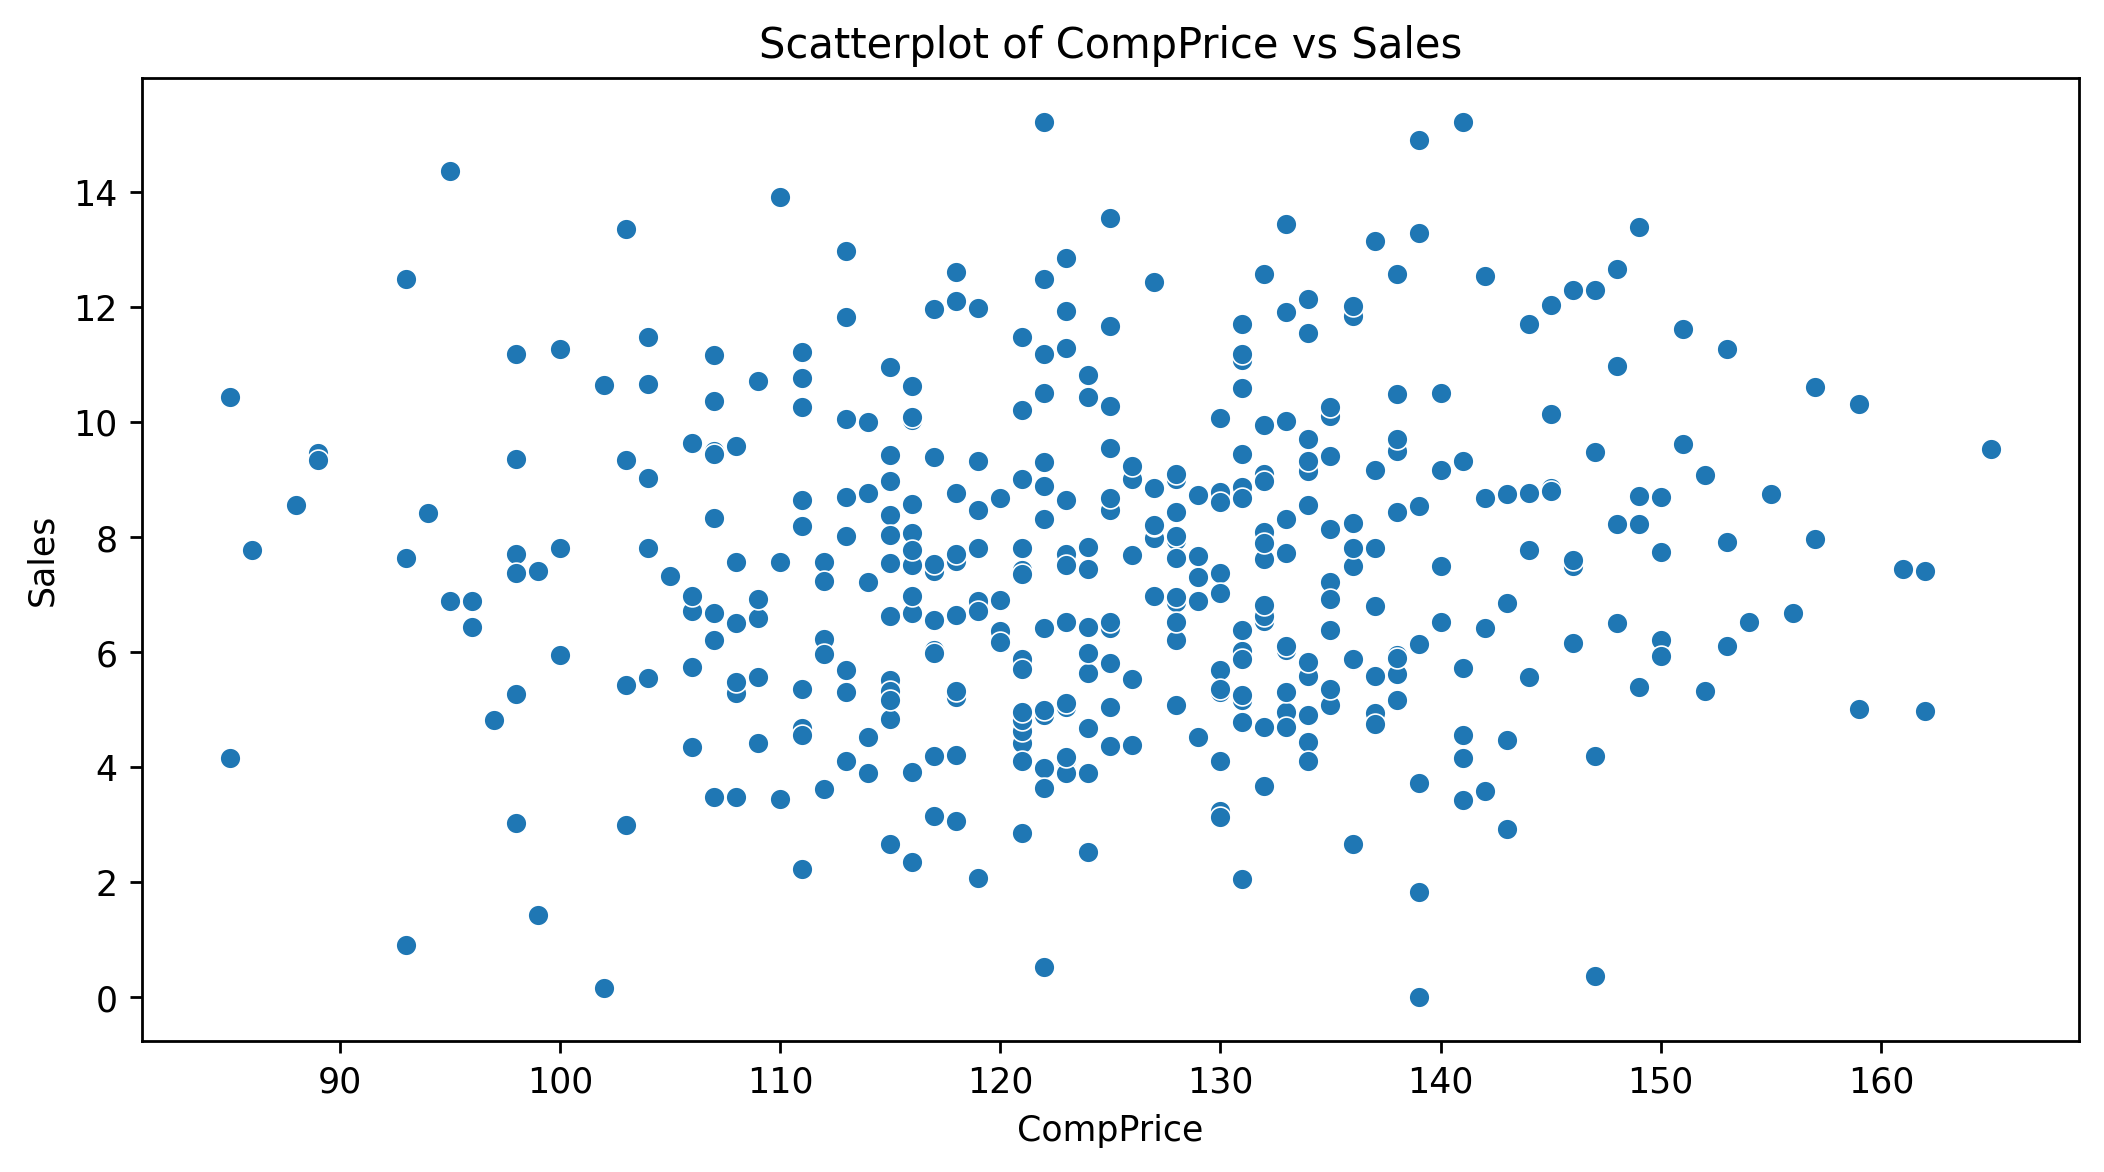

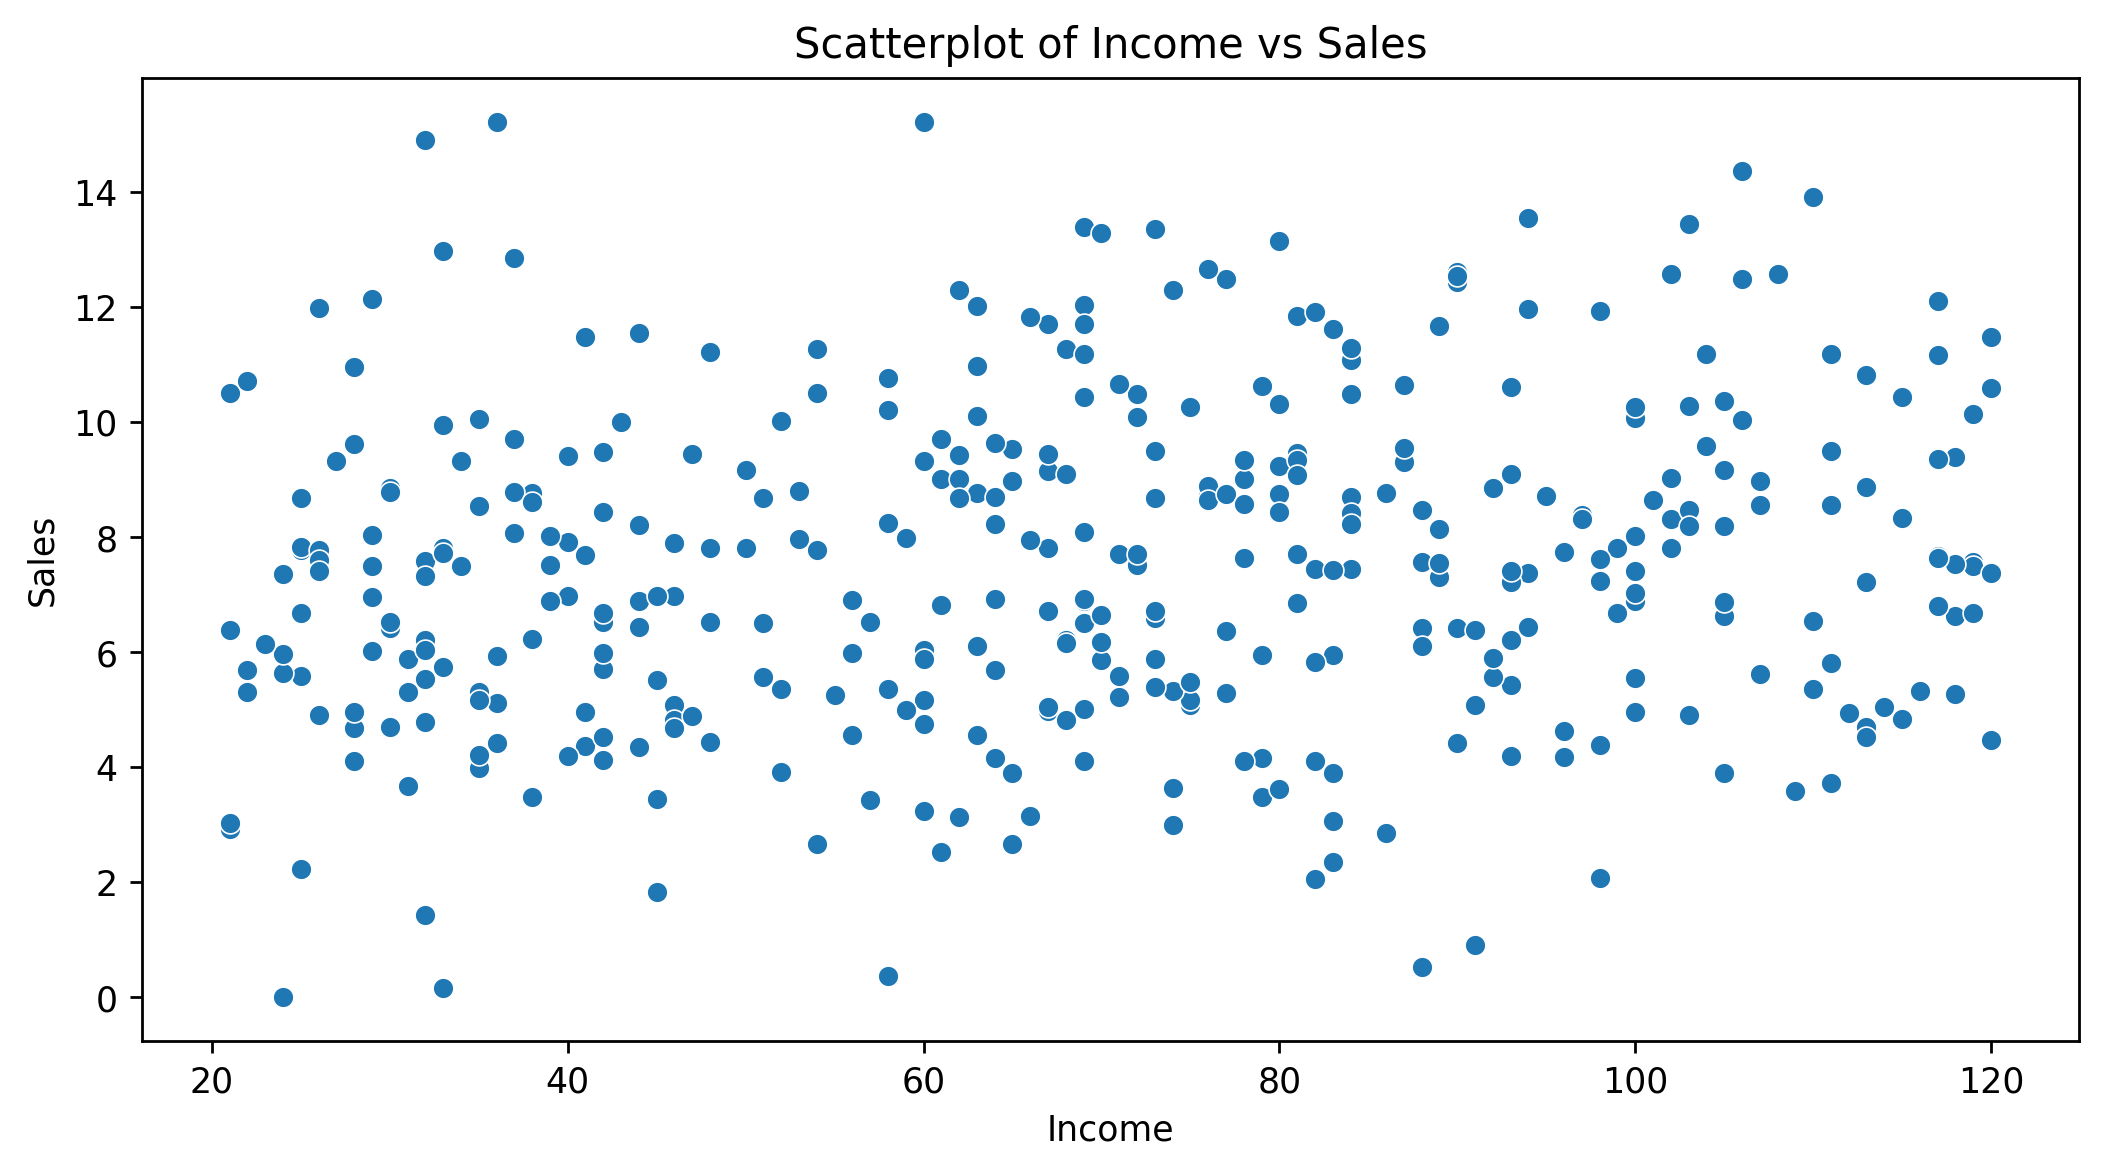

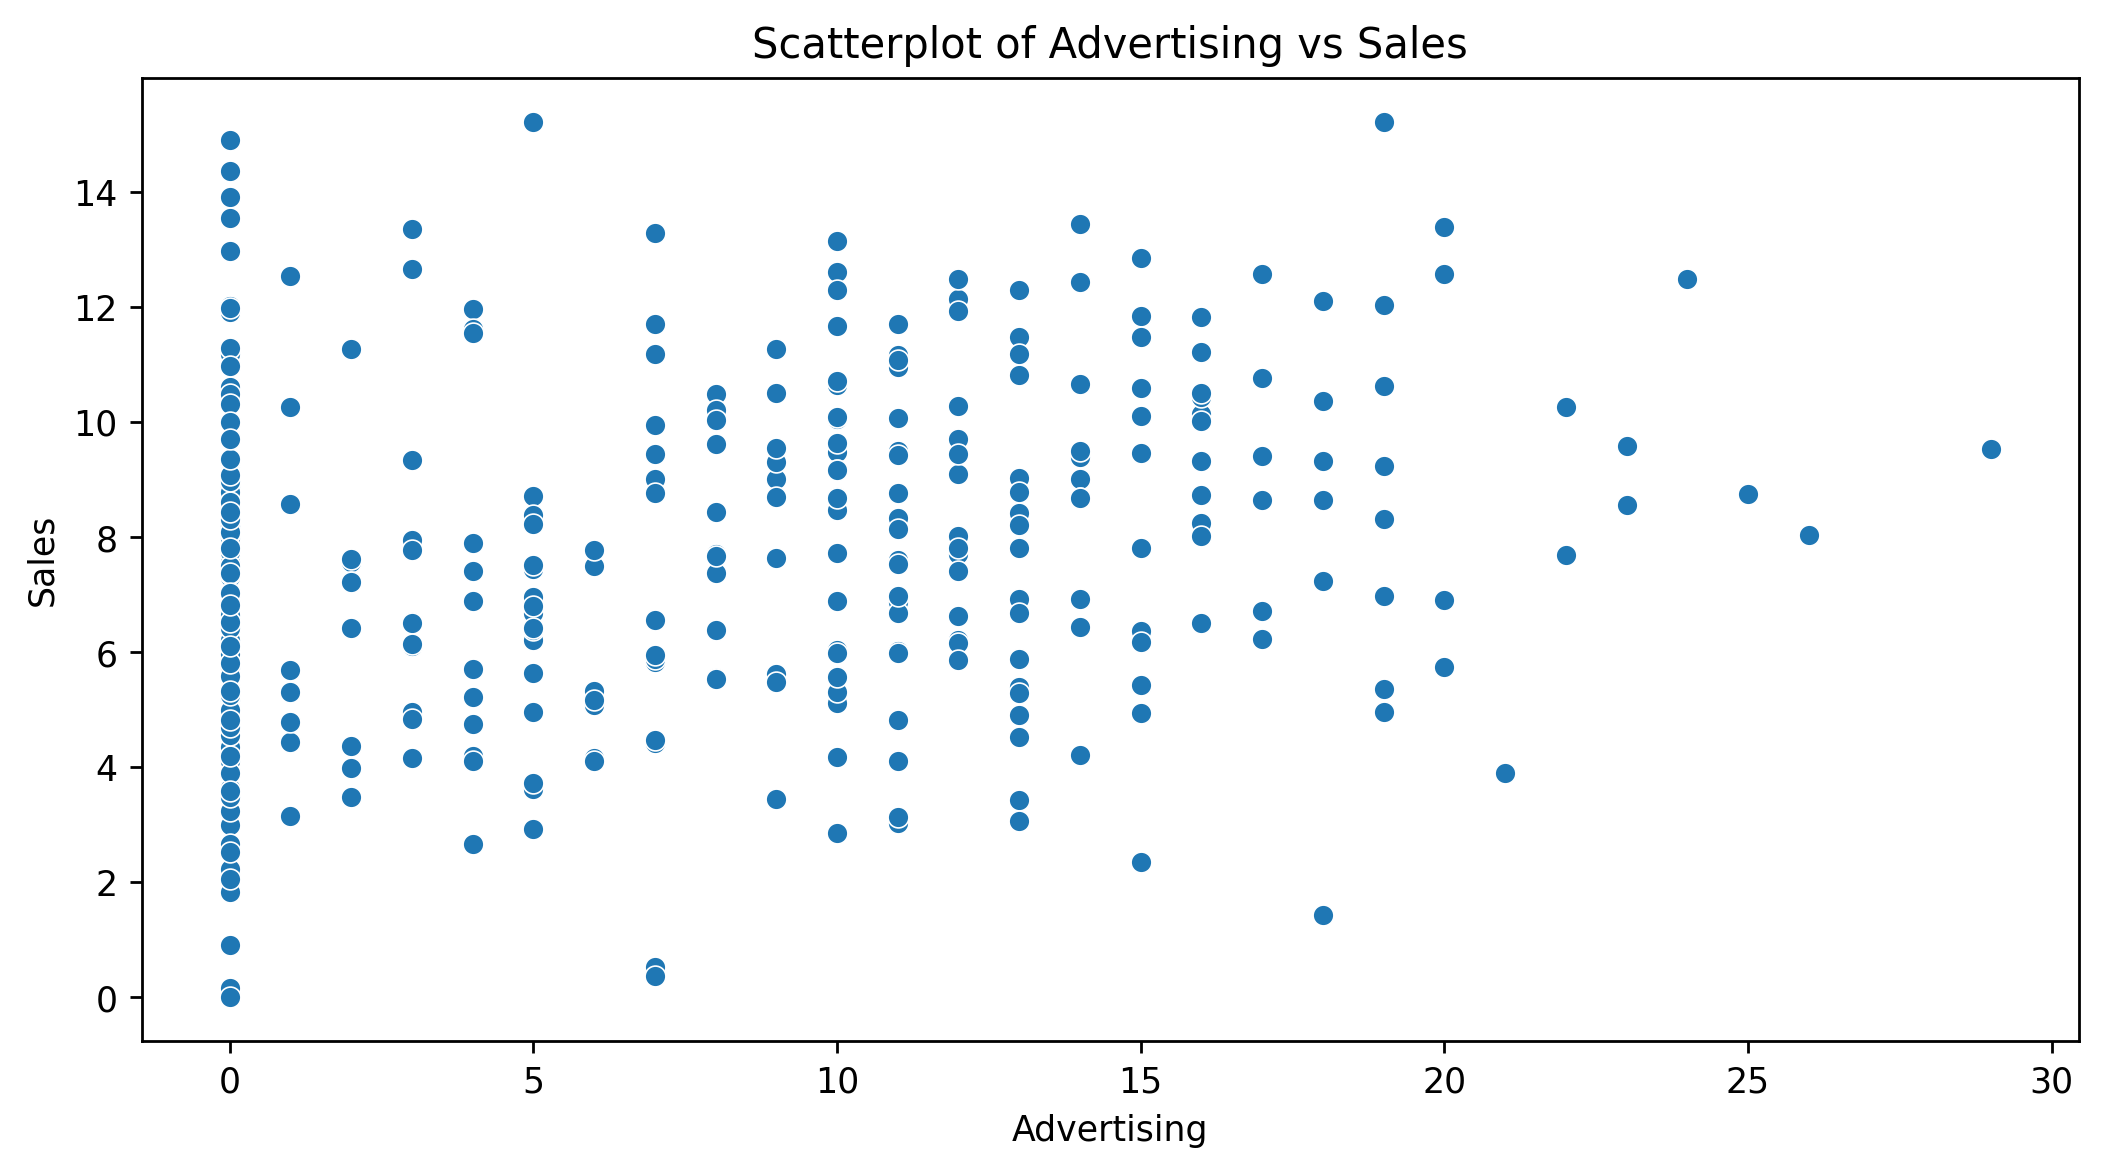

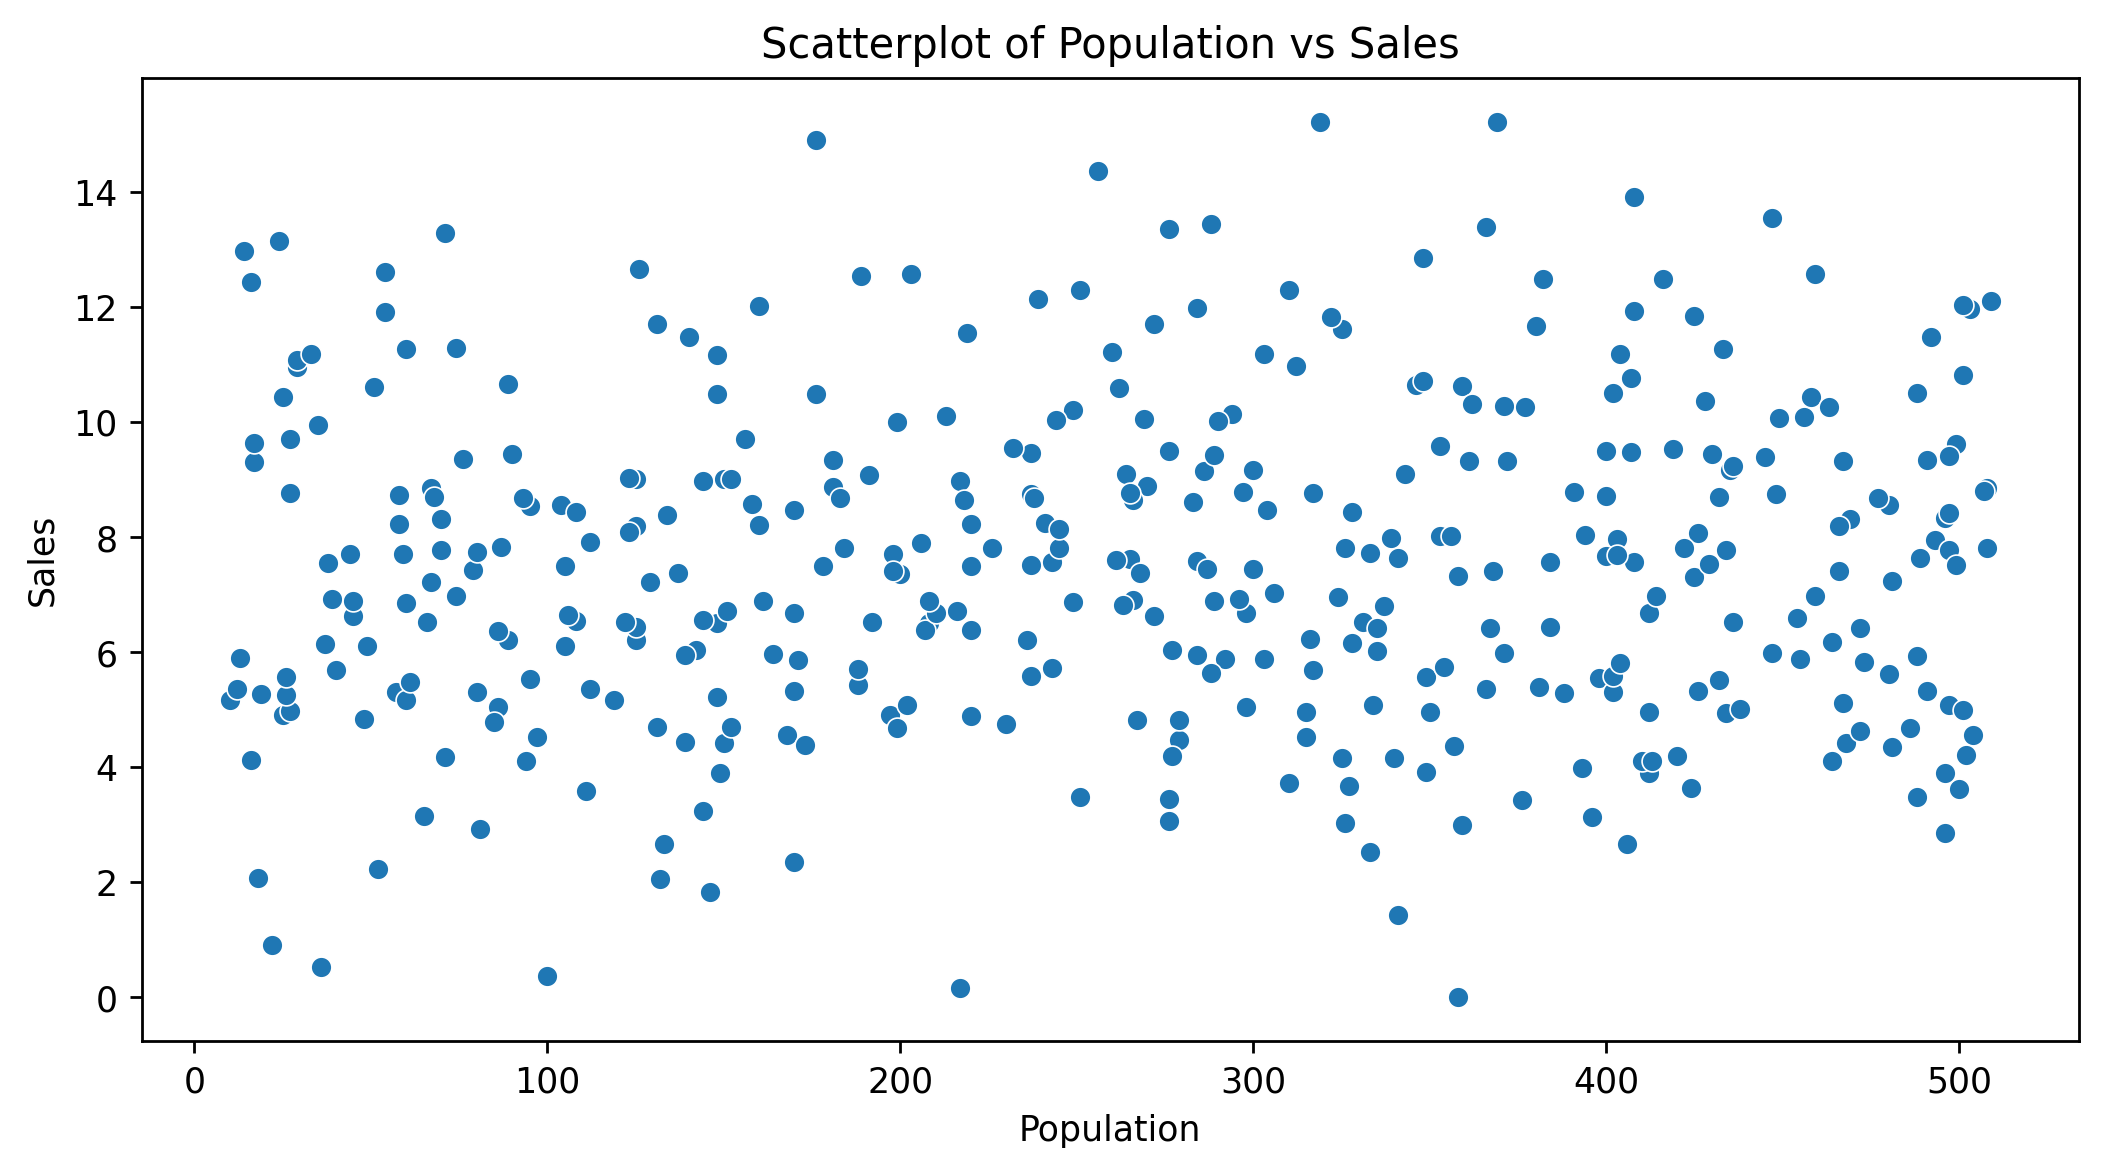

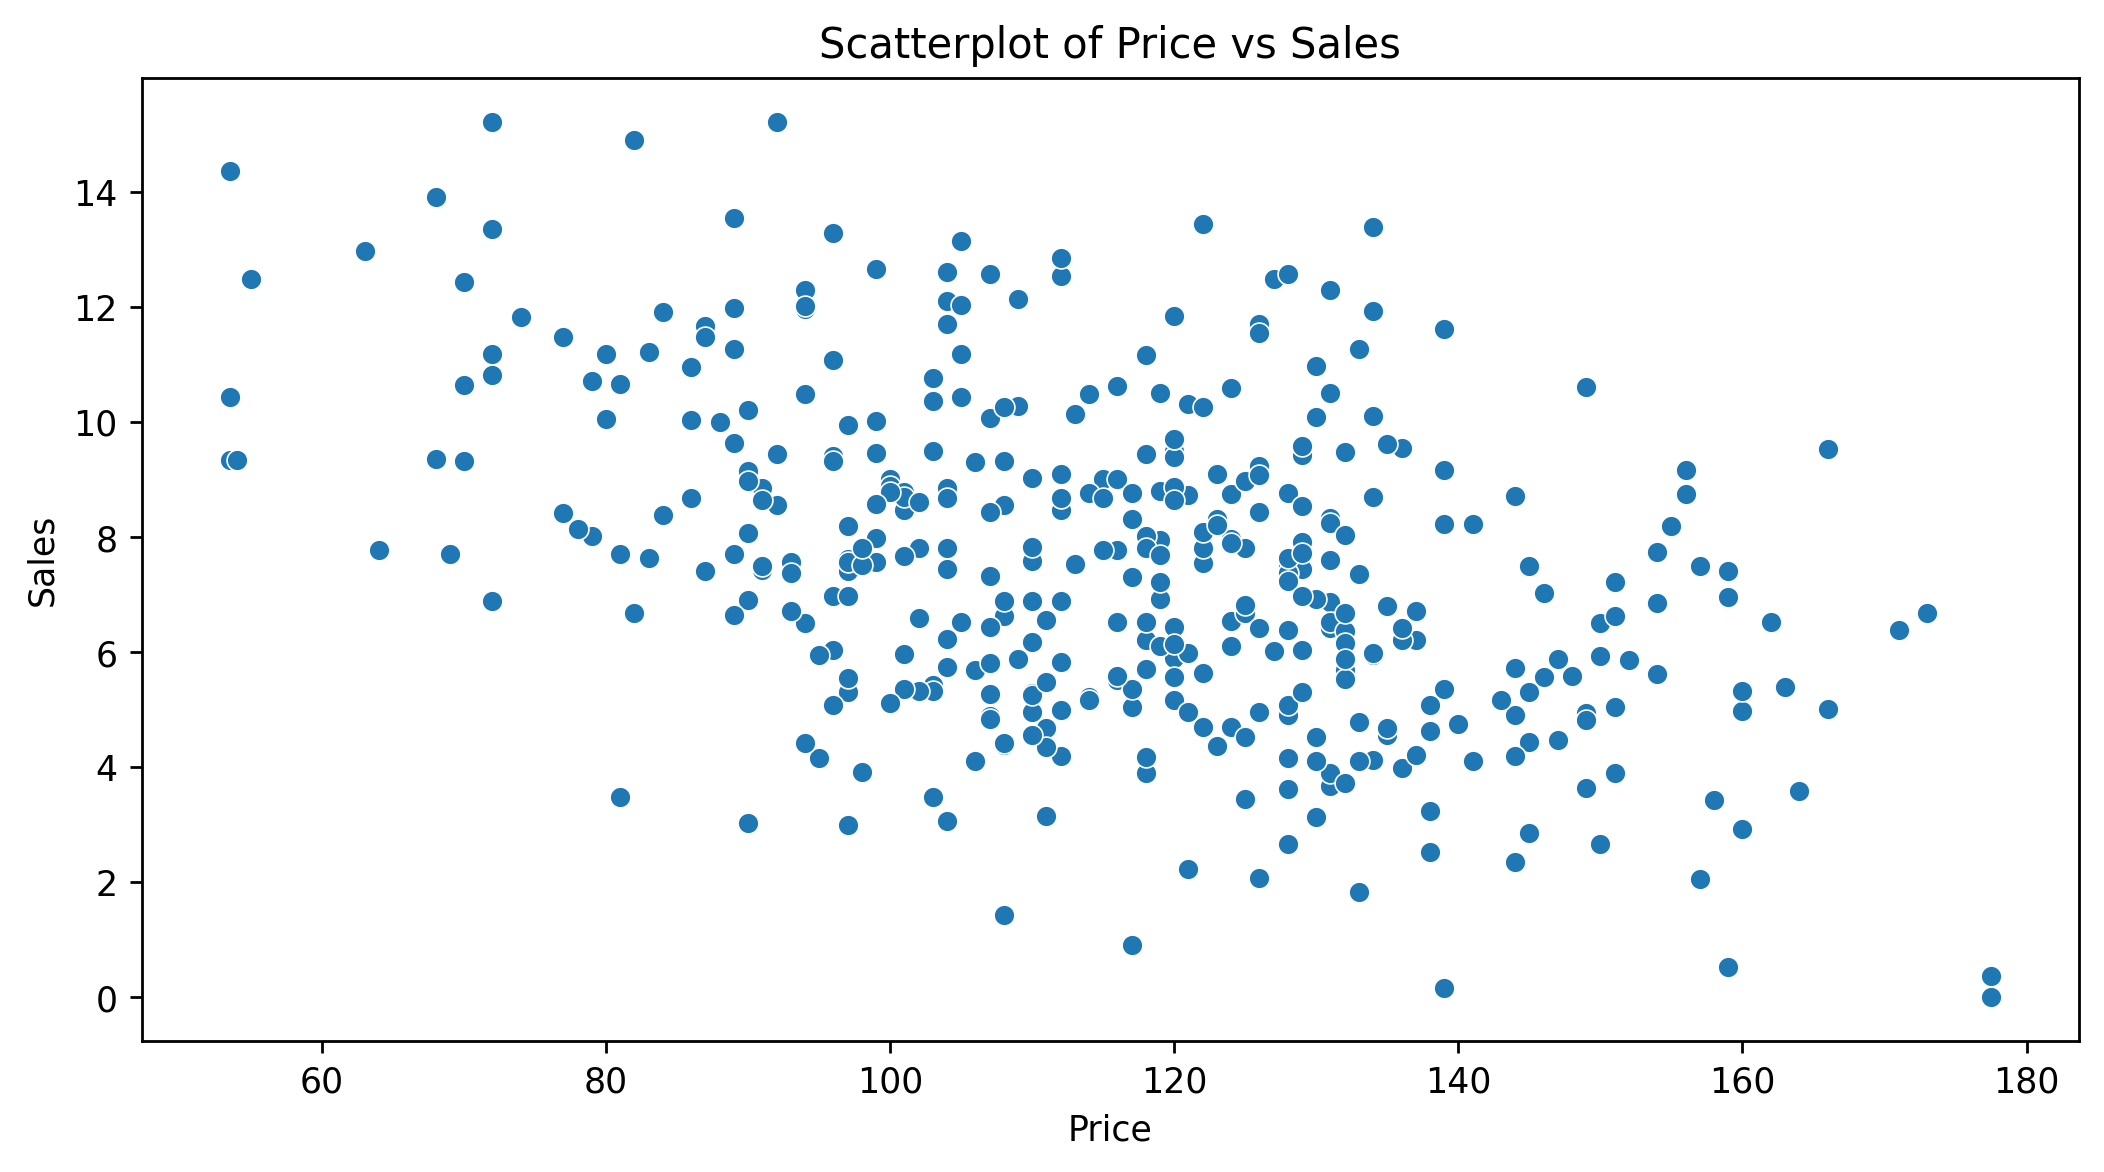

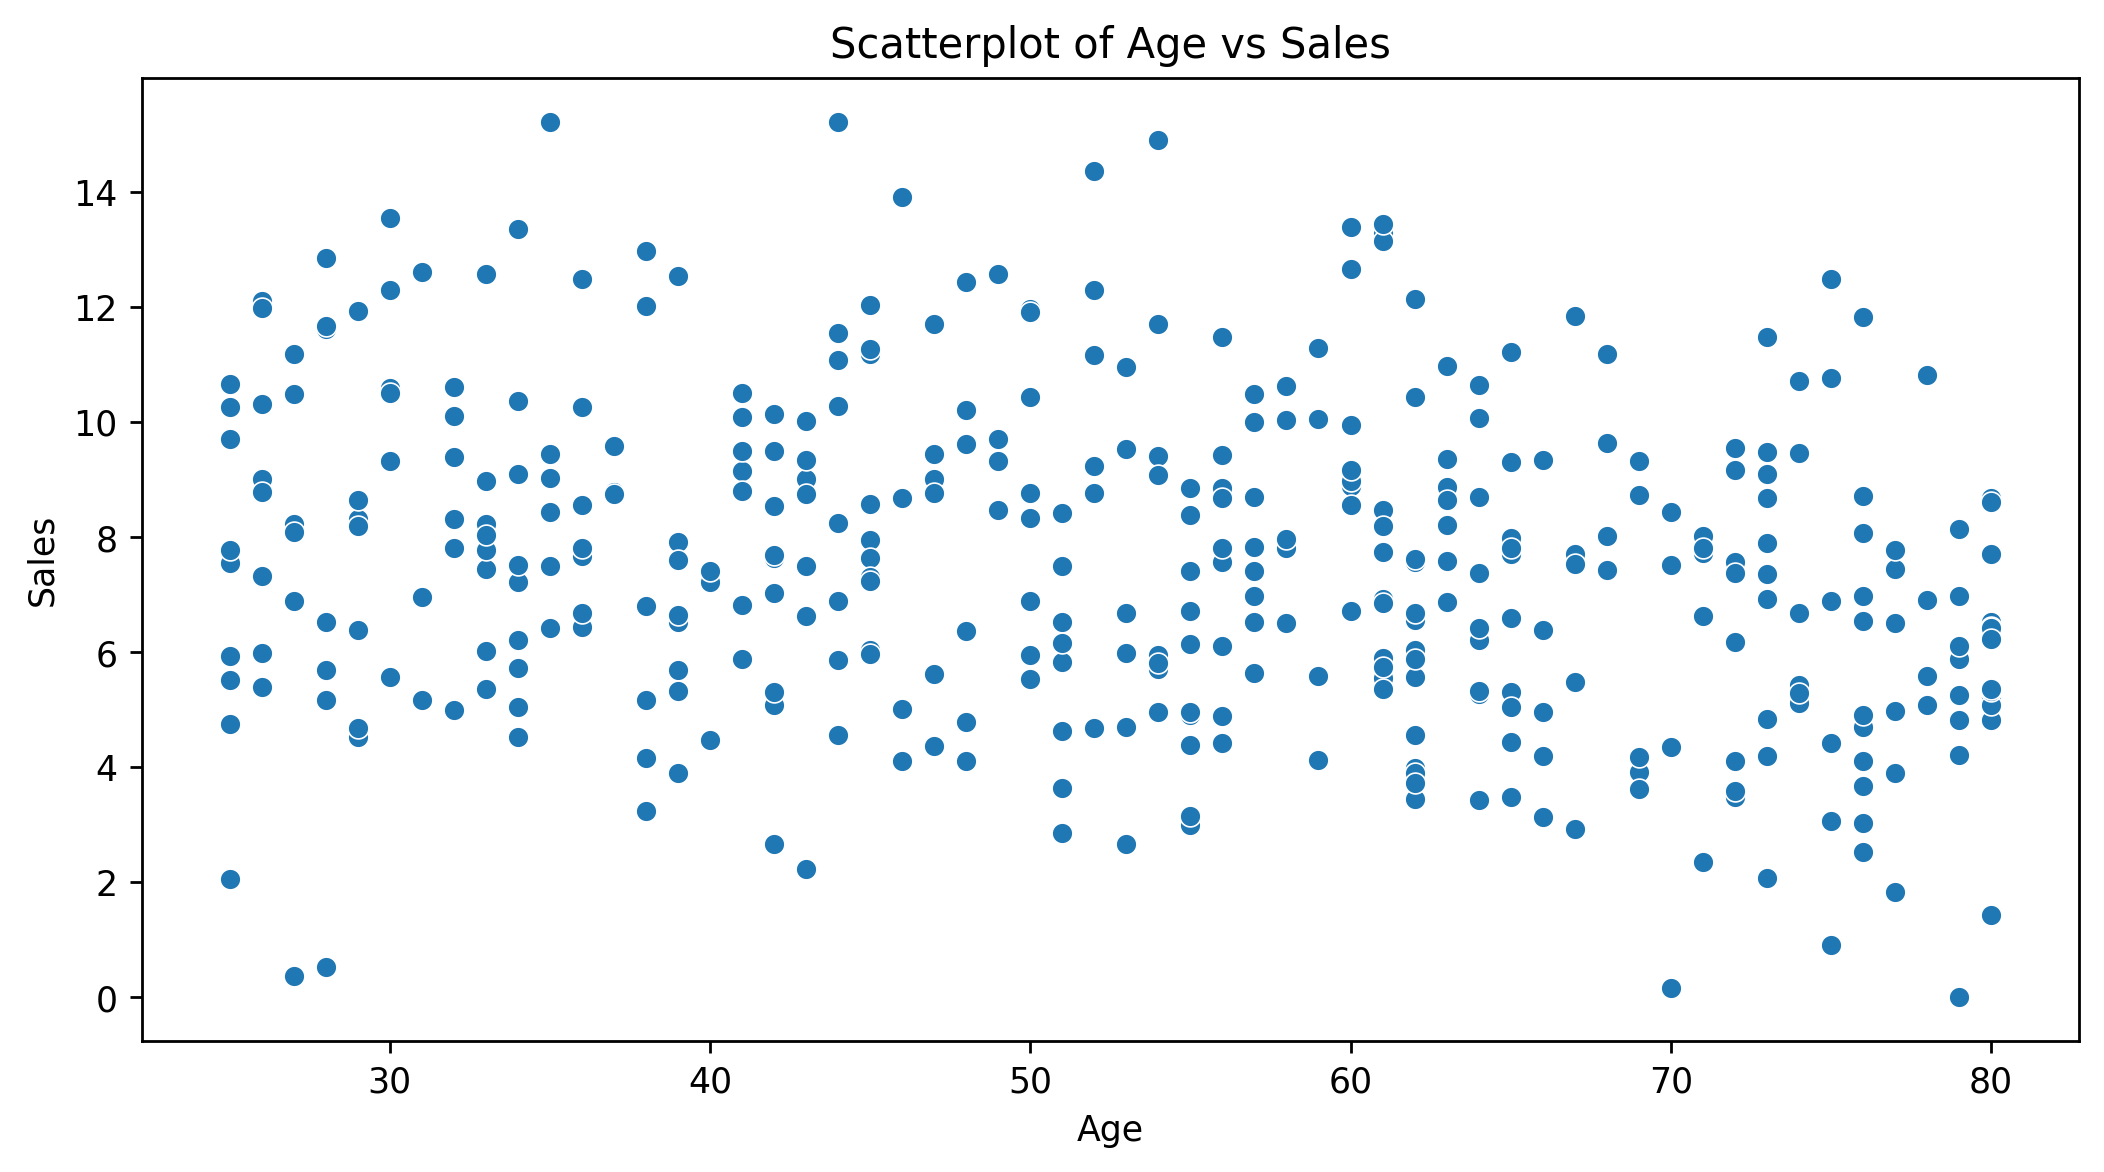

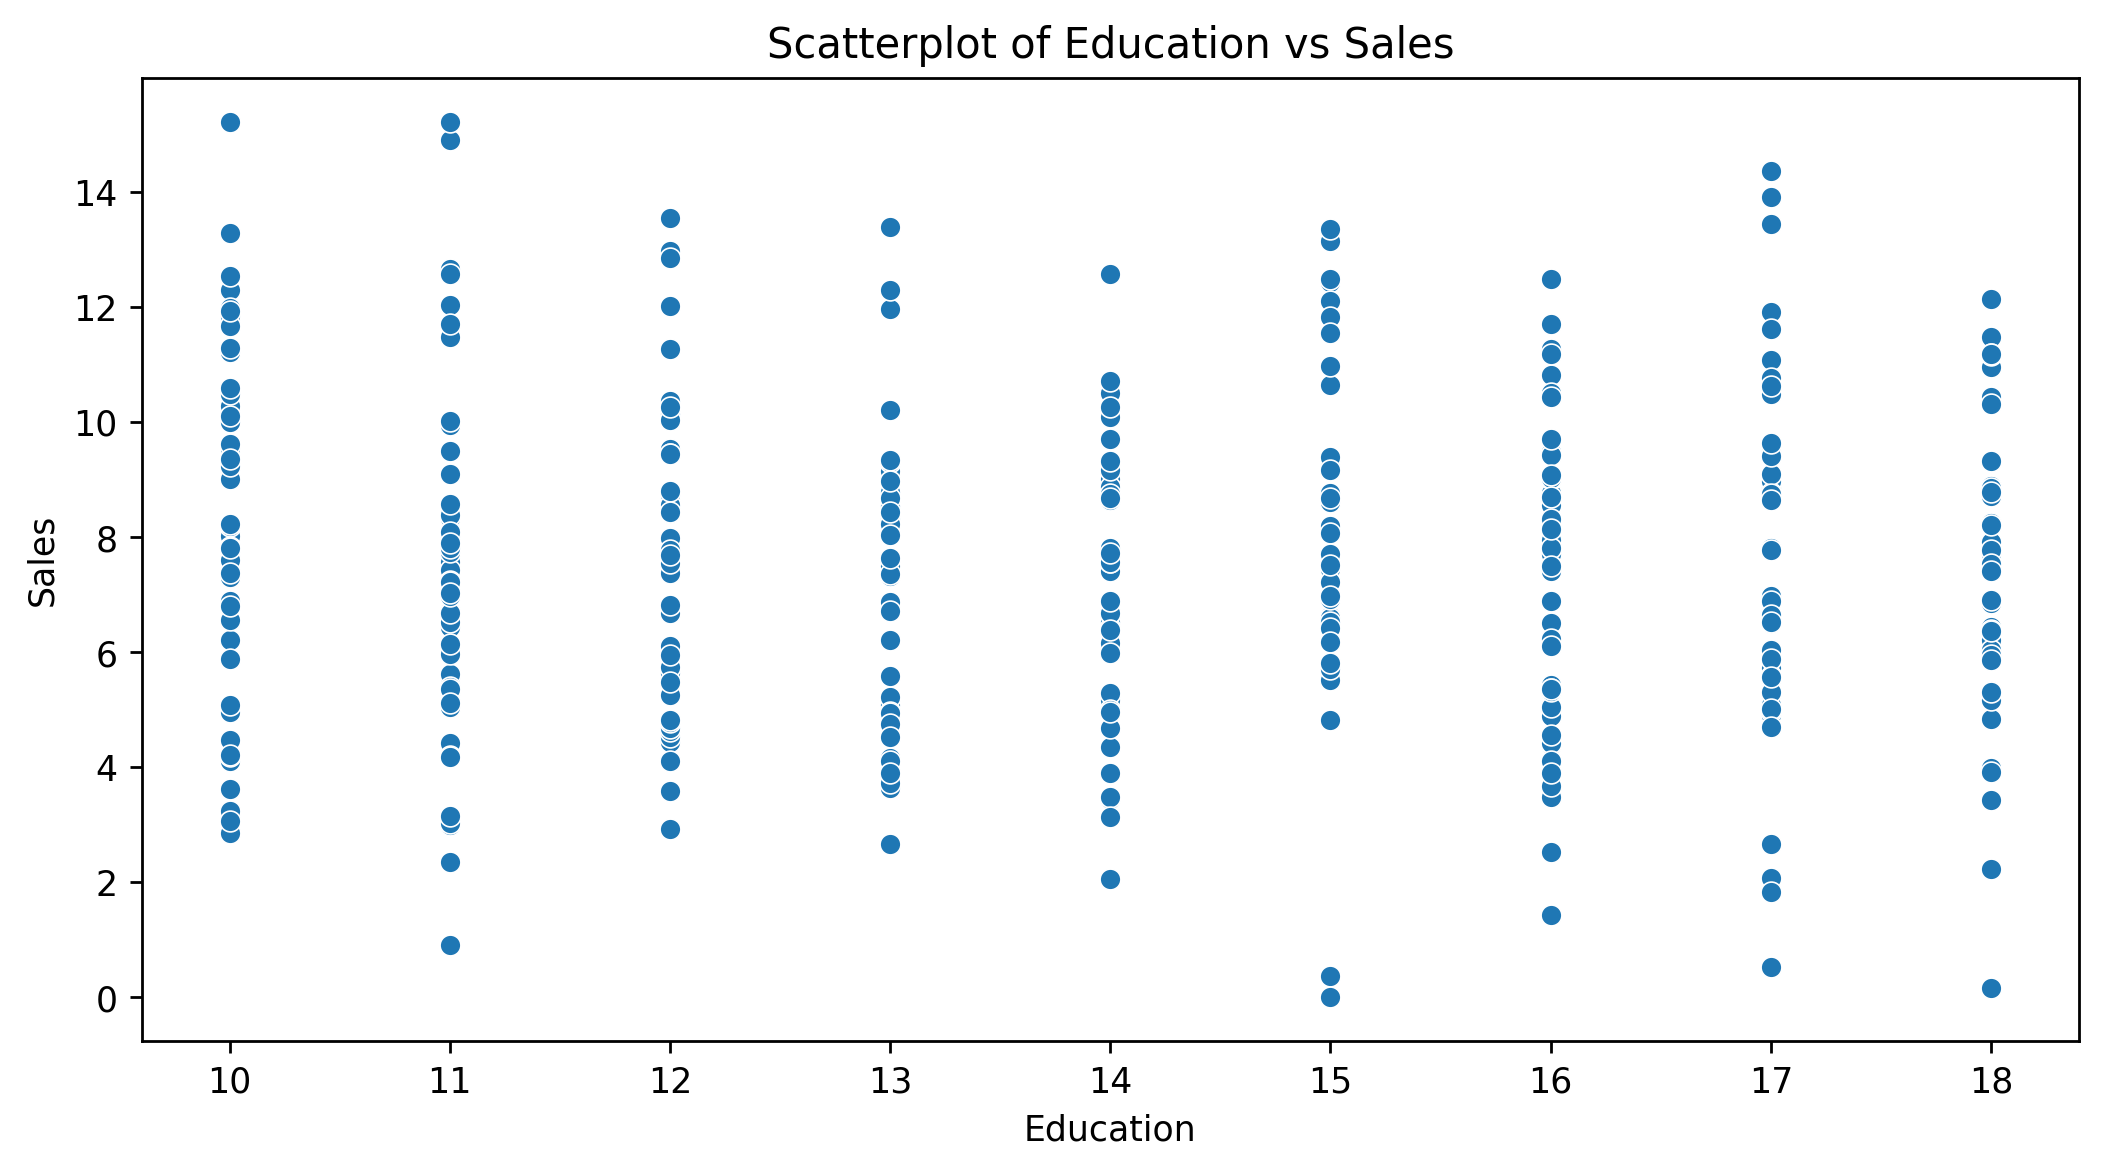

In [49]:
# Loop through the list and create scatterplots
for i in variables_to_plot:
    sns.scatterplot(data=df, x=i, y='Sales')
    plt.title(f'Scatterplot of {i} vs Sales')
    plt.show()

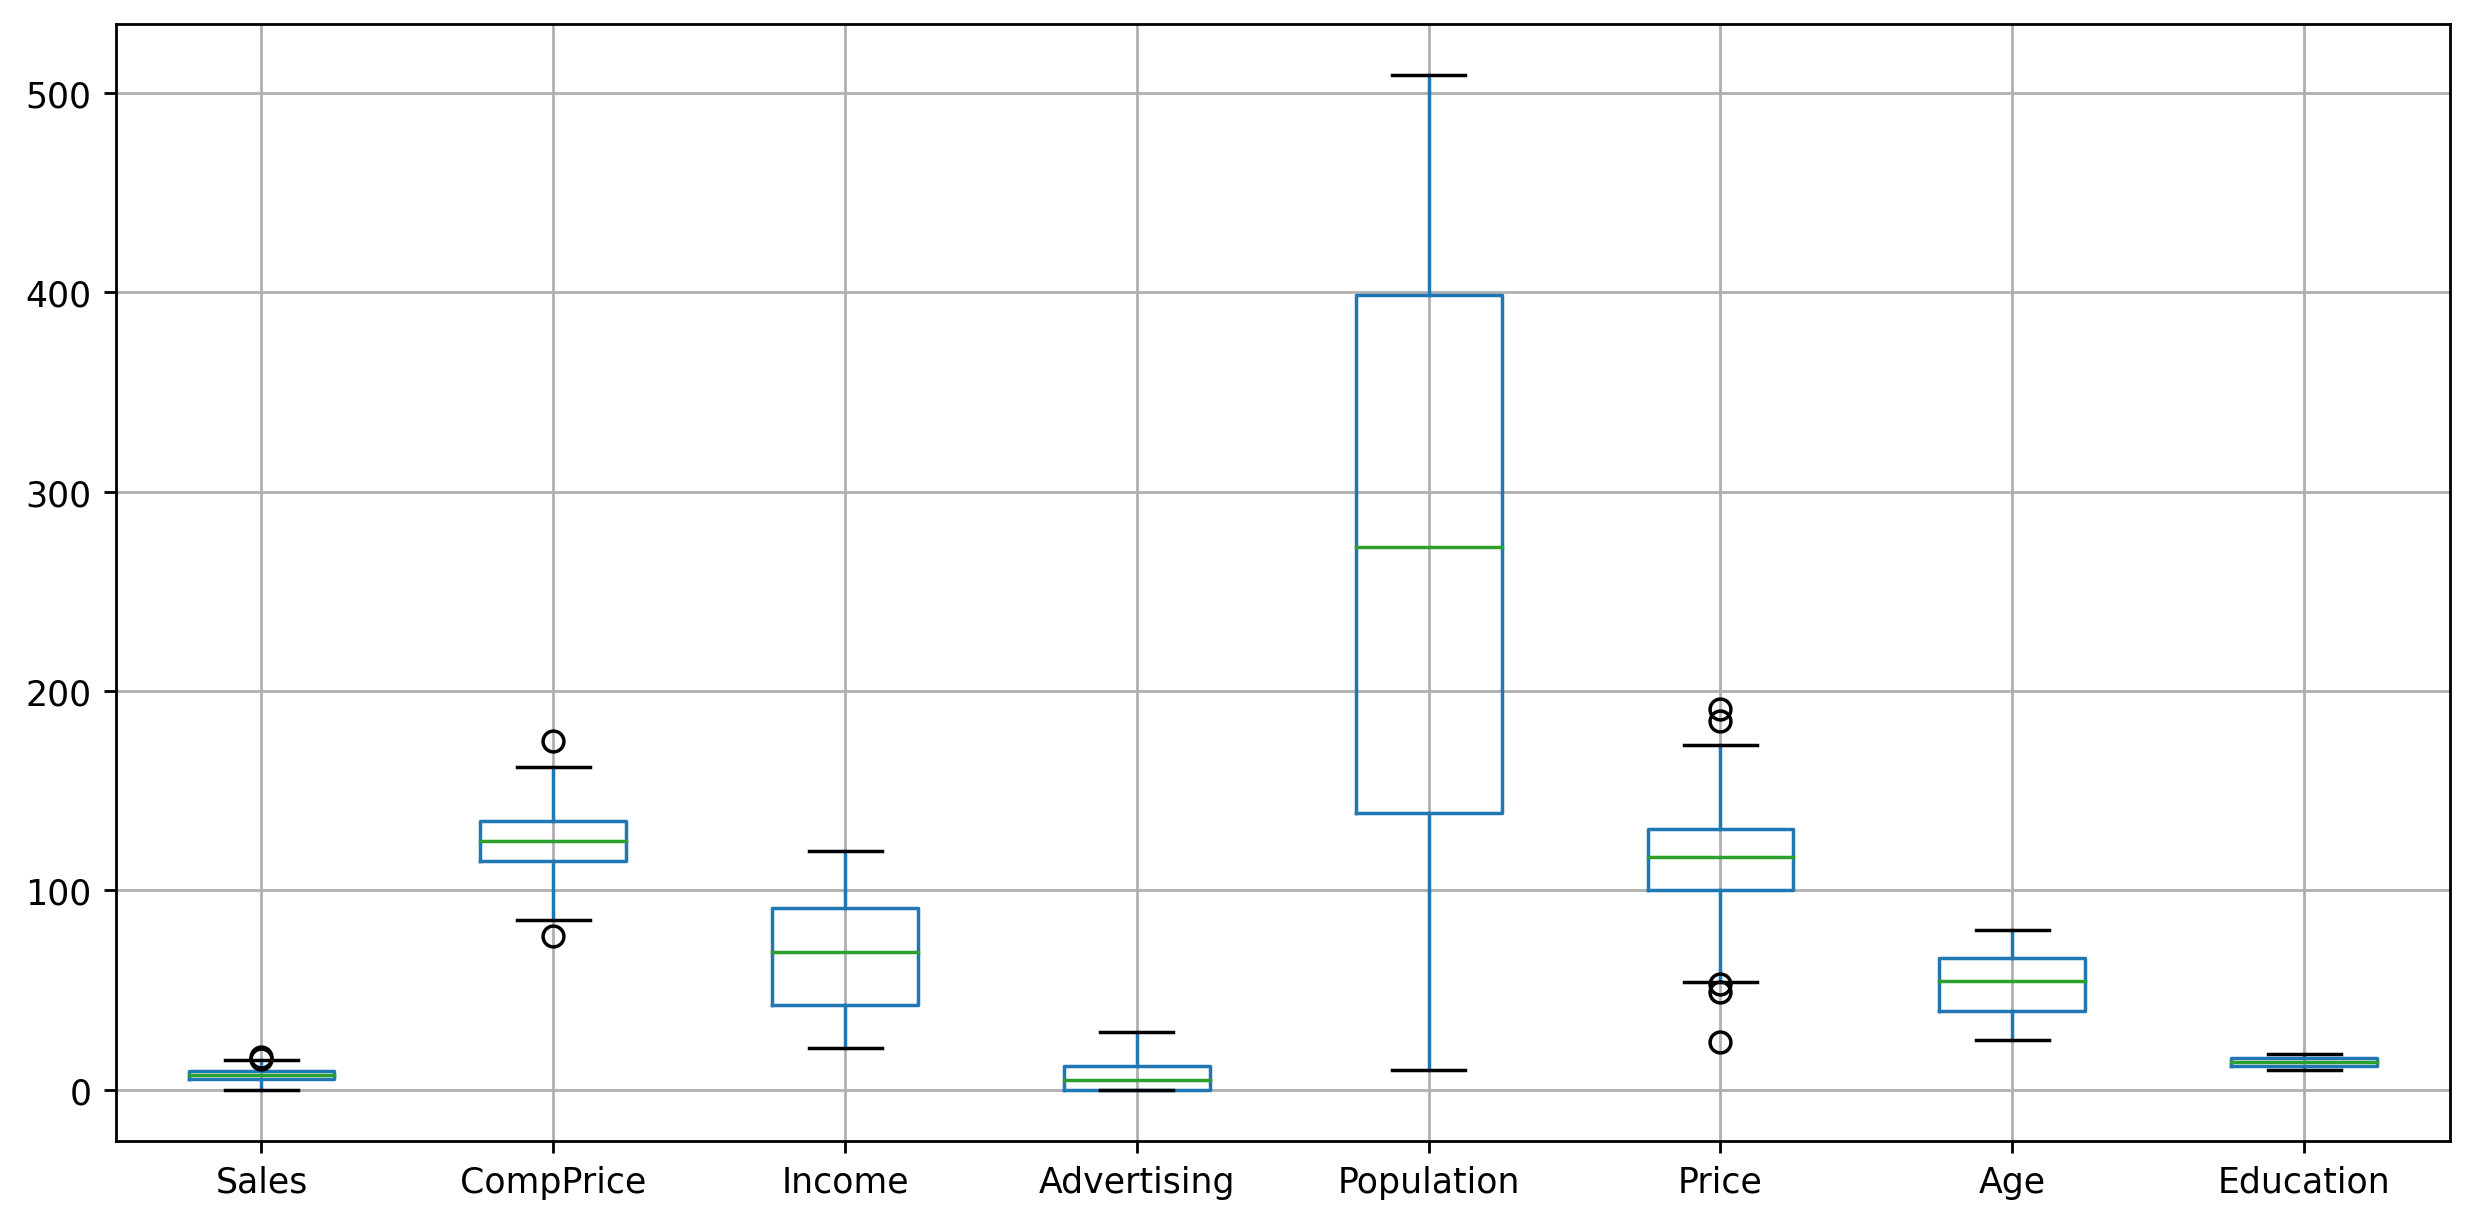

In [16]:
df.boxplot()
plt.tight_layout()

# for delete outliers

In [18]:
import numpy as np
def calculate_whisker(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

# Loop through the list and replace outliers
for i in ['CompPrice','Price','Sales']:
    lw, uw = calculate_whisker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])

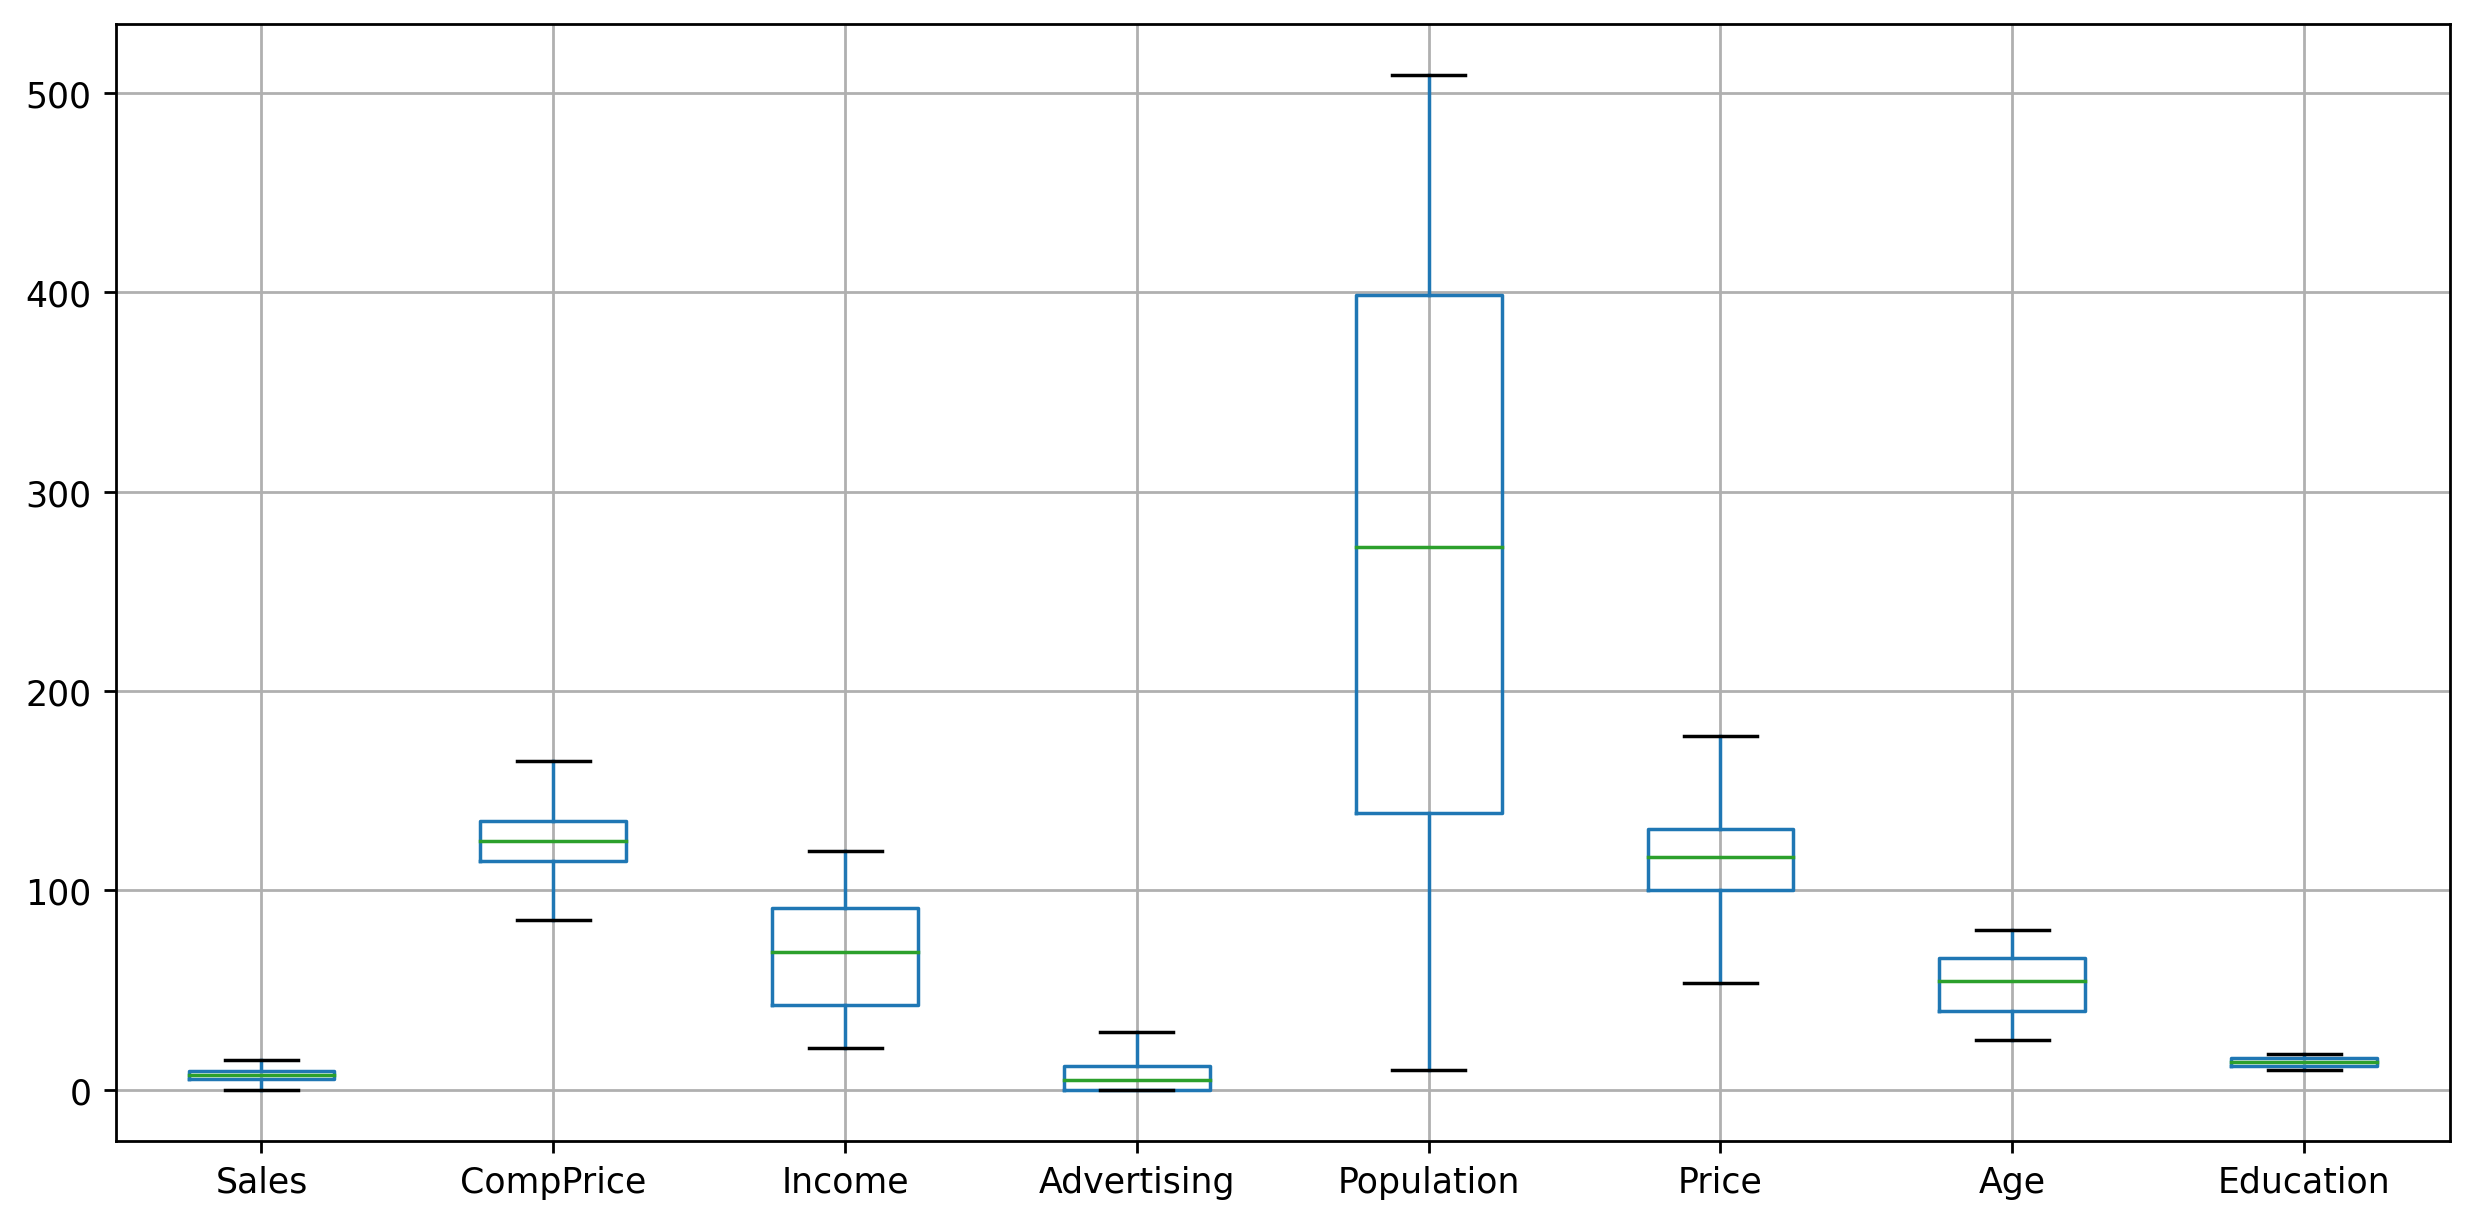

In [19]:
df.boxplot()
plt.tight_layout()

# encodeng -coverting object data in to numeric column

In [20]:
cat_cols = df.select_dtypes(object).columns
cat_cols

Index(['ShelveLoc', 'Urban', 'US'], dtype='object')

In [21]:
df[cat_cols]

,ShelveLoc,Urban,US
0,Bad,Yes,Yes
1,Good,Yes,Yes
2,Medium,Yes,Yes
3,Medium,Yes,Yes
4,Bad,Yes,No
...,...,...,...
395,Good,Yes,Yes
396,Medium,No,Yes
397,Medium,Yes,Yes
398,Bad,Yes,Yes


In [22]:
oe = OrdinalEncoder()

df[cat_cols] = oe.fit_transform(df[cat_cols])

In [24]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138.0,73,11,276,120.0,0.0,42,17,1.0,1.0
1,11.22,111.0,48,16,260,83.0,1.0,65,10,1.0,1.0
2,10.06,113.0,35,10,269,80.0,2.0,59,12,1.0,1.0
3,7.40,117.0,100,4,466,97.0,2.0,55,14,1.0,1.0
4,4.15,141.0,64,3,340,128.0,0.0,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138.0,108,17,203,128.0,1.0,33,14,1.0,1.0
396,6.14,139.0,23,3,37,120.0,2.0,55,11,0.0,1.0
397,7.41,162.0,26,12,368,159.0,2.0,40,18,1.0,1.0
398,5.94,100.0,79,7,284,95.0,0.0,50,12,1.0,1.0


In [25]:
df.dtypes

Sales          float64
CompPrice      float64
Income           int64
Advertising      int64
Population       int64
Price          float64
ShelveLoc      float64
Age              int64
Education        int64
Urban          float64
US             float64
dtype: object

#Model building

In [26]:
x = df.iloc[:,:-1]
y = df['Sales']

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [29]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [30]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
print(f"R2 values: {r2_score(ytest,ypred)}")
print(f"MSE: {mean_squared_error(ytest,ypred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytest,ypred))}")

R2 values: 0.9941449556427602
MSE: 0.04857606665625
RMSE: 0.22039978824002984


In [42]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

# Create a RandomForestRegressor and train it on the training set
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

# Predict on both training and testing sets
ypred_train = rf.predict(xtrain)
ypred_test = rf.predict(xtest)

# Evaluate performance on training set
print("Training Set:")
print(f"R2 Score: {r2_score(ytrain, ypred_train)}")
print(f"Mean Squared Error: {mean_squared_error(ytrain, ypred_train)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(ytrain, ypred_train))}")

# Evaluate performance on testing set
print("\nTesting Set:")
print(f"R2 Score: {r2_score(ytest, ypred_test)}")
print(f"Mean Squared Error: {mean_squared_error(ytest, ypred_test)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(ytest, ypred_test))}")


Training Set:
R2 Score: 0.9997442813095487
Mean Squared Error: 0.0019870604609375443
Root Mean Squared Error: 0.044576456352401365

Testing Set:
R2 Score: 0.9947313614759921
Mean Squared Error: 0.043710981593750003
Root Mean Squared Error: 0.20907171399725502


Number of Estimators: 100


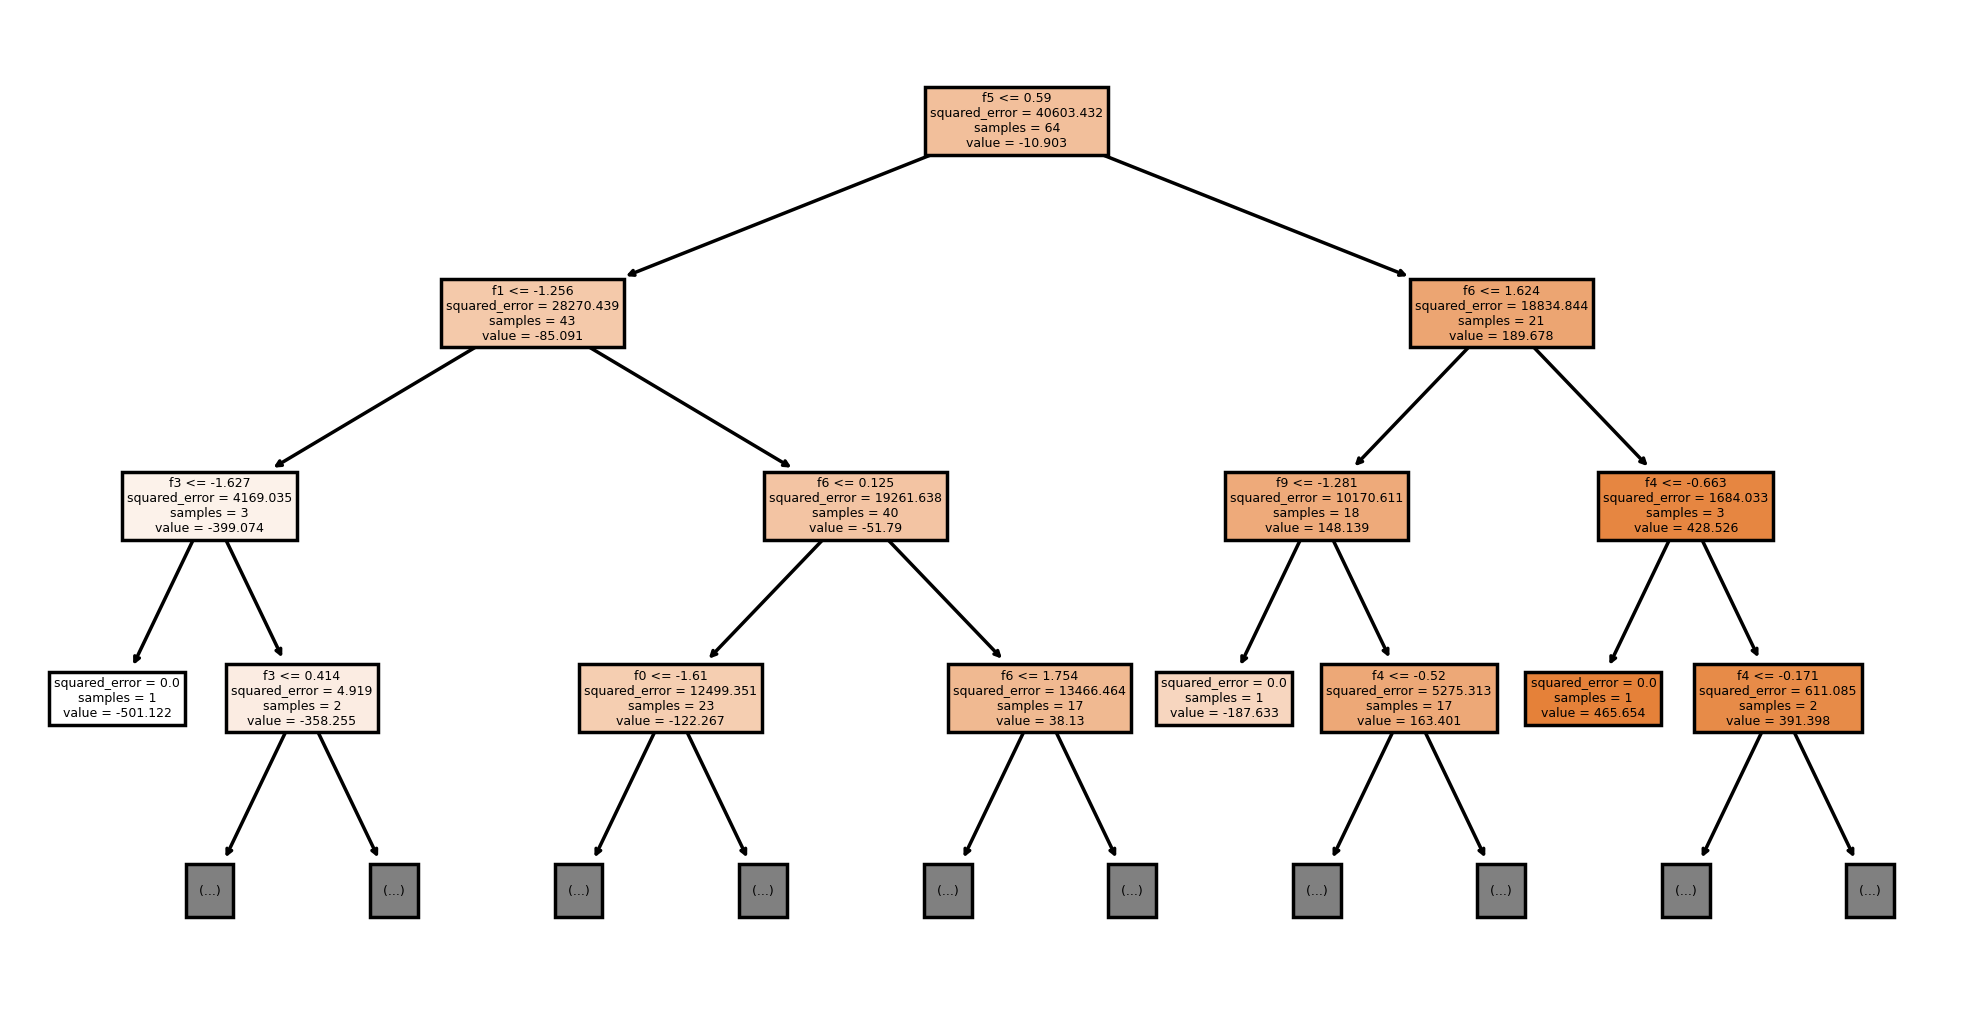

In [45]:
from sklearn.datasets import make_regression
from sklearn.tree import plot_tree
# Generate some example data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Create and fit the RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Check the number of estimators
print("Number of Estimators:", len(rf.estimators_))

# Plot the first tree
plot_tree(rf.estimators_[0], feature_names=['f'+str(i) for i in range(X.shape[1])], filled=True, max_depth=3)
plt.show()